In [43]:
#ik importeer hier mijn python modules
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import pydot
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import plot_tree
#hier stel ik in dat hij de hele colom print
pd.options.display.max_columns = None
pd.options.display.max_rows = None


<h1>Data Understanding</h1>

In [5]:
data = gpd.read_file('data/woz2017.gpkg')

 de dataset die ik hier inlaad is de postcode dataset uit 2017 de dataset heeft een gpkg file format dat gemakelijk met geopandas is in te laden hieronder zie je de kollomen met bijbehoorende data types:
 


In [42]:
data.dtypes

aantal_inwoners                                      int64
aantal_mannen                                        int64
aantal_vrouwen                                       int64
aantal_inwoners_0_tot_15_jaar                        int64
aantal_inwoners_15_tot_25_jaar                       int64
aantal_inwoners_25_tot_45_jaar                       int64
aantal_inwoners_45_tot_65_jaar                       int64
aantal_inwoners_65_jaar_en_ouder                     int64
aantal_part_huishoudens                              int64
gemiddelde_huishoudensgrootte                      float64
aantal_eenpersoonshuishoudens                        int64
aantal_meerpersoonshuishoudens_zonder_kind           int64
aantal_eenouderhuishoudens                           int64
aantal_tweeouderhuishoudens                          int64
aantal_geboorten                                     int64
percentage_nederlandse_achtergrond                   int64
percentage_westerse_migr_achtergr                    int

In [6]:
data.head()

,postcode,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,aantal_part_huishoudens,gemiddelde_huishoudensgrootte,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,aantal_geboorten,percentage_nederlandse_achtergrond,percentage_westerse_migr_achtergr,percentage_niet_westerse_migr_achtergr,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,gemiddelde_woz_waarde_woning,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_meergezins_woningen,aantal_niet_bewoonde_woningen,gemiddeld_gasverbruik_woning,gemiddeld_elektricteitsverbruik_woning,aantal_personen_met_uitkering_onder_AOWlft,oprit_hoofdverkeersweg_gemiddelde_afstand_in_km,kinderdagverblijf_gemiddelde_afstand_in_km,kinderdagverblijf_aantal_binnen_1_km,kinderdagverblijf_aantal_binnen_3_km,kinderdagverblijf_aantal_binnen_5_km,buitenschoolse_opvang_gem_afstand_in_km,buitenschoolse_opvang_aantal_binnen_1_km,buitenschoolse_opvang_aantal_binnen_3_km,buitenschoolse_opvang_aantal_binnen_5_km,grote_supermarkt_gemiddelde_afstand_in_km,grote_supermarkt_aantal_binnen_1_km,grote_supermarkt_aantal_binnen_3_km,grote_supermarkt_aantal_binnen_5_km,winkels_ov_dagelijkse_levensm_gem_afst_in_km,winkels_ov_dagel_levensm_aantal_binnen_1_km,winkels_ov_dagel_levensm_aantal_binnen_3_km,winkels_ov_dagel_levensm_aantal_binnen_5_km,warenhuis_gemiddelde_afstand_in_km,warenhuis_aantal_binnen_5_km,warenhuis_aantal_binnen_10_km,warenhuis_aantal_binnen_20_km,cafe_gemiddelde_afstand_in_km,cafe_aantal_binnen_1_km,cafe_aantal_binnen_3_km,cafe_aantal_binnen_5_km,cafetaria_gemiddelde_afstand_in_km,cafetaria_aantal_binnen_1_km,cafetaria_aantal_binnen_3_km,cafetaria_aantal_binnen_5_km,restaurant_gemiddelde_afstand_in_km,restaurant_aantal_binnen_1_km,restaurant_aantal_binnen_3_km,restaurant_aantal_binnen_5_km,hotel_gemiddelde_afstand_in_km,hotel_aantal_binnen_5_km,hotel_aantal_binnen_10_km,hotel_aantal_binnen_20_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,omgevingsadressendichtheid,stedelijkheid,ms_fid,geometry
0,1011,9645,4990,4655,800,1195,3195,2920,1540,6380,1.5,4175,1305,345,500,80,60,30,10,6110,3605,115,115,800,390,670,370,45,386,30,70,2390,5915,715,860,2030,825,4.6,0.3,6.7,83.5,227.9,0.4,4.0,48.5,146.1,0.3,6.7,73.4,138.8,0.3,61.0,565.4,967.2,0.5,10.8,20.6,36.1,0.1,116.8,555.0,732.7,0.2,109.0,609.4,861.0,0.1,178.8,1219.4,1738.4,0.2,349.1,400.0,464.4,1.2,1.2,0.7,6907,1,1,"MULTIPOLYGON (((122246.232 487910.177, 122259...."
1,1012,8240,4480,3760,465,1195,4195,1730,650,5960,1.4,4245,1175,190,260,70,50,30,10,5695,4725,20,50,85,490,225,105,-99997,343,20,80,720,5380,1185,1020,2060,480,4.0,0.4,4.2,101.2,239.6,0.6,2.4,57.4,146.1,0.3,7.5,69.7,142.9,0.1,131.8,567.5,986.0,0.5,10.9,20.6,38.8,0.1,183.7,574.7,737.9,0.1,199.9,624.5,874.3,0.0,313.0,1267.9,1759.3,0.1,354.5,400.2,469.9,0.8,0.8,1.3,8410,1,2,"MULTIPOLYGON (((121995.029 488243.202, 121999...."
2,1013,21080,10550,10525,2640,1860,7685,6115,2775,12580,1.7,7525,2430,1020,1510,265,60,20,20,12825,6930,75,115,1625,1475,445,2005,160,329,30,70,6340,12670,1540,880,1950,2720,2.9,0.3,6.9,54.7,166.6,0.3,5.6,34.7,107.7,0.4,4.5,34.5,108.7,0.2,42.1,348.1,809.5,0.8,9.5,20.9,39.0,0.3,26.8,363.9,677.7,0.2,34.1,392.6,772.2,0.2,65.6,729.6,1529.2,0.6,338.0,398.9,467.7,1.7,1.7,2.0,6224,1,3,"MULTIPOLYGON (((120506.219 489494.551, 120495...."
3,1014,645,375,270,65,45,400,115,20,330,1.7,170,105,10,45,10,60,20,20,270,20,5,5,5,20,185,-99997,25,395,10,80,10,225,30,490,2180,80,0.7,0.6,4.1,47.6,135.7,0.5

In [11]:
data.describe()

,postcode,aantal_inwoners,aantal_mannen,aantal_vrouwen,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_inwoners_45_tot_65_jaar,aantal_inwoners_65_jaar_en_ouder,aantal_part_huishoudens,gemiddelde_huishoudensgrootte,aantal_eenpersoonshuishoudens,aantal_meerpersoonshuishoudens_zonder_kind,aantal_eenouderhuishoudens,aantal_tweeouderhuishoudens,aantal_geboorten,percentage_nederlandse_achtergrond,percentage_westerse_migr_achtergr,percentage_niet_westerse_migr_achtergr,aantal_woningen,aantal_woningen_bouwjaar_voor_1945,aantal_woningen_bouwjaar_45_tot_65,aantal_woningen_bouwjaar_65_tot_75,aantal_woningen_bouwjaar_75_tot_85,aantal_woningen_bouwjaar_85_tot_95,aantal_woningen_bouwjaar_95_tot_05,aantal_woningen_bouwjaar_05_tot_15,aantal_woningen_bouwjaar_15_en_later,gemiddelde_woz_waarde_woning,percentage_koopwoningen,percentage_huurwoningen,aantal_huurwoningen_in_bezit_woningcorporaties,aantal_meergezins_woningen,aantal_niet_bewoonde_woningen,gemiddeld_gasverbruik_woning,gemiddeld_elektricteitsverbruik_woning,aantal_personen_met_uitkering_onder_AOWlft,oprit_hoofdverkeersweg_gemiddelde_afstand_in_km,kinderdagverblijf_gemiddelde_afstand_in_km,kinderdagverblijf_aantal_binnen_1_km,kinderdagverblijf_aantal_binnen_3_km,kinderdagverblijf_aantal_binnen_5_km,buitenschoolse_opvang_gem_afstand_in_km,buitenschoolse_opvang_aantal_binnen_1_km,buitenschoolse_opvang_aantal_binnen_3_km,buitenschoolse_opvang_aantal_binnen_5_km,grote_supermarkt_gemiddelde_afstand_in_km,grote_supermarkt_aantal_binnen_1_km,grote_supermarkt_aantal_binnen_3_km,grote_supermarkt_aantal_binnen_5_km,winkels_ov_dagelijkse_levensm_gem_afst_in_km,winkels_ov_dagel_levensm_aantal_binnen_1_km,winkels_ov_dagel_levensm_aantal_binnen_3_km,winkels_ov_dagel_levensm_aantal_binnen_5_km,warenhuis_gemiddelde_afstand_in_km,warenhuis_aantal_binnen_5_km,warenhuis_aantal_binnen_10_km,warenhuis_aantal_binnen_20_km,cafe_gemiddelde_afstand_in_km,cafe_aantal_binnen_1_km,cafe_aantal_binnen_3_km,cafe_aantal_binnen_5_km,cafetaria_gemiddelde_afstand_in_km,cafetaria_aantal_binnen_1_km,cafetaria_aantal_binnen_3_km,cafetaria_aantal_binnen_5_km,restaurant_gemiddelde_afstand_in_km,restaurant_aantal_binnen_1_km,restaurant_aantal_binnen_3_km,restaurant_aantal_binnen_5_km,hotel_gemiddelde_afstand_in_km,hotel_aantal_binnen_5_km,hotel_aantal_binnen_10_km,hotel_aantal_binnen_20_km,treinstation_gemiddelde_afstand_in_km,overstapstation_gemiddelde_afstand_in_km,brandweerkazerne_gemiddelde_afstand_in_km,omgevingsadressendichtheid,stedelijkheid,ms_fid
count,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.00000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.00000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.00000,4066.000000,4066.000000,4066.000000,4066.000000,4066.000000,4066.00000,4066.000000,4066.000000
mean,5670.497787,3413.069602,1198.473438,1132.528283,-2045.798574,-2434.535170,-980.518692,30.256026,-1387.346532,1006.169700,-907.676562,-2690.75578,-2162.969749,-13683.565912,-2256.914412,-23420.865224,-924.834481,-6730.732415,-17454.990162,1004.961387,-10216.028037,-15601.969257,-18446.370143,-15851.158879,-15096.117314,-13936.737580,-19976.798574,-59517.632071,-2473.551156,-2147.970979,-5748.257501,-16779.222823,-18757.878751,-11348.895721,-759.764142,1177.716921,-5316.836940,-7

<h1>Data Preperation</h1>

In [13]:
data = data[['postcode','gemiddelde_woz_waarde_woning','geometry']]
data2 = data
data2 = data2[data2.gemiddelde_woz_waarde_woning != -99997]
postcode = gpd.read_file('data/link/postcodetabel.csv')
postcode = postcode[['postcode','gemeente']]
postcode.head()

,postcode,gemeente
0,6651,Druten
1,1189,Amstelveen
2,1065,Amsterdam
3,8471,Weststellingwerf
4,7231,Zutphen


In [15]:
data2.postcode = data2.postcode.astype(int)
postcode.postcode = postcode.postcode.astype(int)
ok = data2.merge(postcode, on='postcode')
ok = ok.drop_duplicates()
ok.to_csv('data/link/dataset.csv')

In [16]:
gemiddeldewoz = ok[['gemeente','gemiddelde_woz_waarde_woning']].groupby('gemeente').mean()
gemiddeldewoz['gemiddelde_woz_waarde_gemeente'] = gemiddeldewoz['gemiddelde_woz_waarde_woning']
# gemiddeldewoz = data[['gemeente','gemiddelde_woz_waarde_gemeente']]
gemiddeldewoz = gemiddeldewoz.drop(columns='gemiddelde_woz_waarde_woning')
data = ok.merge(gemiddeldewoz, on='gemeente')

In [17]:
np.set_printoptions(threshold=np.inf)
 
min_max_scaler = preprocessing.MinMaxScaler()
 
data_minmax = min_max_scaler.fit_transform(data[["gemiddelde_woz_waarde_gemeente"]])
data["woz_normalisatie"] = data_minmax

In [18]:
data.describe()

,postcode,gemiddelde_woz_waarde_woning,gemiddelde_woz_waarde_gemeente,woz_normalisatie
count,4091.000000,4091.000000,4091.000000,4091.000000
mean,5668.399658,238.686140,238.686140,0.207166
std,2667.054865,87.781777,53.780450,0.100206
min,1011.000000,75.000000,127.500000,0.000000
25%,3334.500000,182.000000,201.103448,0.137141
50%,5692.000000,227.000000,237.750000,0.205422
75%,8022.500000,275.000000,269.400000,0.264394
max,9999.000000,1157.000000,664.200000,1.000000


>De normalisatie heeft gewerkt de min van WOZ_normalisatie is 0 en de max is 1

In [20]:
#klasificeren
p25 = data['woz_normalisatie'].quantile(q=0.25)
p50 = data['woz_normalisatie'].quantile(q=0.50)
p75 = data['woz_normalisatie'].quantile(q=0.75)
p100 = data['woz_normalisatie'].quantile(q=1)
m1 = data["woz_normalisatie"] < p25
m2 = np.logical_and(data["woz_normalisatie"] > p25,data["woz_normalisatie"] < p50)
m3 = np.logical_and(data["woz_normalisatie"] > p50,data["woz_normalisatie"] < p75)
m4 = data["woz_normalisatie"] > p75
data['klasse_woz'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Hoog','Heel-Hoog'], default='none')

In [21]:
data.to_csv('data/link/datasetwoznormaliseerd.csv')

In [22]:
wozwaarde = data
def wozwaardeAPI(gemeente):
    wozdata = wozwaarde.loc[wozwaarde['gemeente'] == gemeente]
    return wozdata.to_dict(orient='records')

>dit is de functie voor de flaskreactapi die data in json aanlevert via het web.

<h1> Descision Tree</h1>

In [23]:
data = gpd.read_file('data/woz2017.gpkg')

In [24]:
data = data[[ 'aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later', 'gemiddelde_woz_waarde_woning',
       'percentage_koopwoningen', 'percentage_huurwoningen',
       'aantal_huurwoningen_in_bezit_woningcorporaties',
       'aantal_meergezins_woningen', 'aantal_niet_bewoonde_woningen',
       'gemiddeld_gasverbruik_woning',
       'gemiddeld_elektricteitsverbruik_woning',
       'aantal_personen_met_uitkering_onder_AOWlft',
       'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_3_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_3_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_3_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_3_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km', 'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km', 'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km', 'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_3_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km', 'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_3_km', 'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km', 'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_3_km', 'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km', 'hotel_aantal_binnen_5_km',
       'hotel_aantal_binnen_10_km', 'hotel_aantal_binnen_20_km',
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km',
       'omgevingsadressendichtheid', 'stedelijkheid', 'ms_fid']]

In [25]:
data = pd.DataFrame(data)

In [26]:
np.set_printoptions(threshold=np.inf)
 
min_max_scaler = preprocessing.MinMaxScaler()
 
data_minmax = min_max_scaler.fit_transform(data[["gemiddelde_woz_waarde_woning"]])
data["woz_normalisatie"] = data_minmax

In [27]:
#klasificeren
p25 = data['woz_normalisatie'].quantile(q=0.25)
p50 = data['woz_normalisatie'].quantile(q=0.50)
p75 = data['woz_normalisatie'].quantile(q=0.75)
p100 = data['woz_normalisatie'].quantile(q=1)
m1 = data["woz_normalisatie"] < p25
m2 = np.logical_and(data["woz_normalisatie"] > p25,data["woz_normalisatie"] < p50)
m3 = np.logical_and(data["woz_normalisatie"] > p50,data["woz_normalisatie"] < p75)
m4 = data["woz_normalisatie"] > p75
data['klasse_woz'] = np.select([m1,m2,m3,m4], ['Laag','Middel','Hoog','Heel-Hoog'], default='Laag')

In [28]:
y = data['klasse_woz']

y.replace(to_replace='Laag', value= '0', inplace=True)
y.replace(to_replace='Middel', value= '1', inplace=True)
y.replace(to_replace='Hoog', value= '2', inplace=True)
y.replace(to_replace='Heel-Hoog', value= '3', inplace=True)


In [29]:
y.describe()

count     4066
unique       4
top          0
freq      1083
Name: klasse_woz, dtype: object

In [30]:
y.unique()

array(['3', '1', '2', '0'], dtype=object)

>hierboven zie je dat het klasificeren heeft gewerkt er zijn nog 4 unique waarden 0,1,2 en 3

In [32]:
dtree = data.drop(columns=['gemiddelde_woz_waarde_woning','klasse_woz','woz_normalisatie'])

feature_cols = ['aantal_inwoners', 'aantal_mannen', 'aantal_vrouwen',
       'aantal_inwoners_0_tot_15_jaar', 'aantal_inwoners_15_tot_25_jaar',
       'aantal_inwoners_25_tot_45_jaar', 'aantal_inwoners_45_tot_65_jaar',
       'aantal_inwoners_65_jaar_en_ouder', 'aantal_part_huishoudens',
       'gemiddelde_huishoudensgrootte', 'aantal_eenpersoonshuishoudens',
       'aantal_meerpersoonshuishoudens_zonder_kind',
       'aantal_eenouderhuishoudens', 'aantal_tweeouderhuishoudens',
       'aantal_geboorten', 'percentage_nederlandse_achtergrond',
       'percentage_westerse_migr_achtergr',
       'percentage_niet_westerse_migr_achtergr', 'aantal_woningen',
       'aantal_woningen_bouwjaar_voor_1945',
       'aantal_woningen_bouwjaar_45_tot_65',
       'aantal_woningen_bouwjaar_65_tot_75',
       'aantal_woningen_bouwjaar_75_tot_85',
       'aantal_woningen_bouwjaar_85_tot_95',
       'aantal_woningen_bouwjaar_95_tot_05',
       'aantal_woningen_bouwjaar_05_tot_15',
       'aantal_woningen_bouwjaar_15_en_later',
       'percentage_koopwoningen',
       'percentage_huurwoningen',
       'aantal_huurwoningen_in_bezit_woningcorporaties',
       'aantal_meergezins_woningen', 'aantal_niet_bewoonde_woningen',
       'gemiddeld_gasverbruik_woning',
       'gemiddeld_elektricteitsverbruik_woning',
       'aantal_personen_met_uitkering_onder_AOWlft',
       'oprit_hoofdverkeersweg_gemiddelde_afstand_in_km',
       'kinderdagverblijf_gemiddelde_afstand_in_km',
       'kinderdagverblijf_aantal_binnen_1_km',
       'kinderdagverblijf_aantal_binnen_3_km',
       'kinderdagverblijf_aantal_binnen_5_km',
       'buitenschoolse_opvang_gem_afstand_in_km',
       'buitenschoolse_opvang_aantal_binnen_1_km',
       'buitenschoolse_opvang_aantal_binnen_3_km',
       'buitenschoolse_opvang_aantal_binnen_5_km',
       'grote_supermarkt_gemiddelde_afstand_in_km',
       'grote_supermarkt_aantal_binnen_1_km',
       'grote_supermarkt_aantal_binnen_3_km',
       'grote_supermarkt_aantal_binnen_5_km',
       'winkels_ov_dagelijkse_levensm_gem_afst_in_km',
       'winkels_ov_dagel_levensm_aantal_binnen_1_km',
       'winkels_ov_dagel_levensm_aantal_binnen_3_km',
       'winkels_ov_dagel_levensm_aantal_binnen_5_km',
       'warenhuis_gemiddelde_afstand_in_km', 'warenhuis_aantal_binnen_5_km',
       'warenhuis_aantal_binnen_10_km', 'warenhuis_aantal_binnen_20_km',
       'cafe_gemiddelde_afstand_in_km', 'cafe_aantal_binnen_1_km',
       'cafe_aantal_binnen_3_km', 'cafe_aantal_binnen_5_km',
       'cafetaria_gemiddelde_afstand_in_km', 'cafetaria_aantal_binnen_1_km',
       'cafetaria_aantal_binnen_3_km', 'cafetaria_aantal_binnen_5_km',
       'restaurant_gemiddelde_afstand_in_km', 'restaurant_aantal_binnen_1_km',
       'restaurant_aantal_binnen_3_km', 'restaurant_aantal_binnen_5_km',
       'hotel_gemiddelde_afstand_in_km', 'hotel_aantal_binnen_5_km',
       'hotel_aantal_binnen_10_km', 'hotel_aantal_binnen_20_km',
       'treinstation_gemiddelde_afstand_in_km',
       'overstapstation_gemiddelde_afstand_in_km',
       'brandweerkazerne_gemiddelde_afstand_in_km',
       'omgevingsadressendichtheid', 'stedelijkheid']
X = dtree[feature_cols].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


<h1>Modeling</h1>

In [33]:
clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 20)


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)
f1_score(y_test,y_pred,average='micro')

0.5540983606557377

In [34]:
classes = feature_cols
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5540983606557377


In [35]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


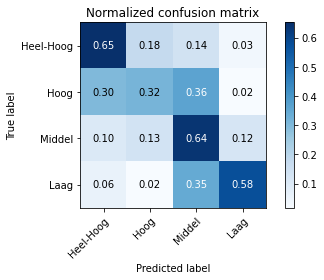

In [36]:
classes = ['Heel-Hoog','Hoog','Middel','Laag']
plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)

> Conclusie het model is beter in het voorspellen van woz waarden die heel-hoog en Middel zijn  met een rating van ongeveer 65 procent

>het model heeft het meeste moeite met het voorspellen van wozwaarden in de categorie hoog

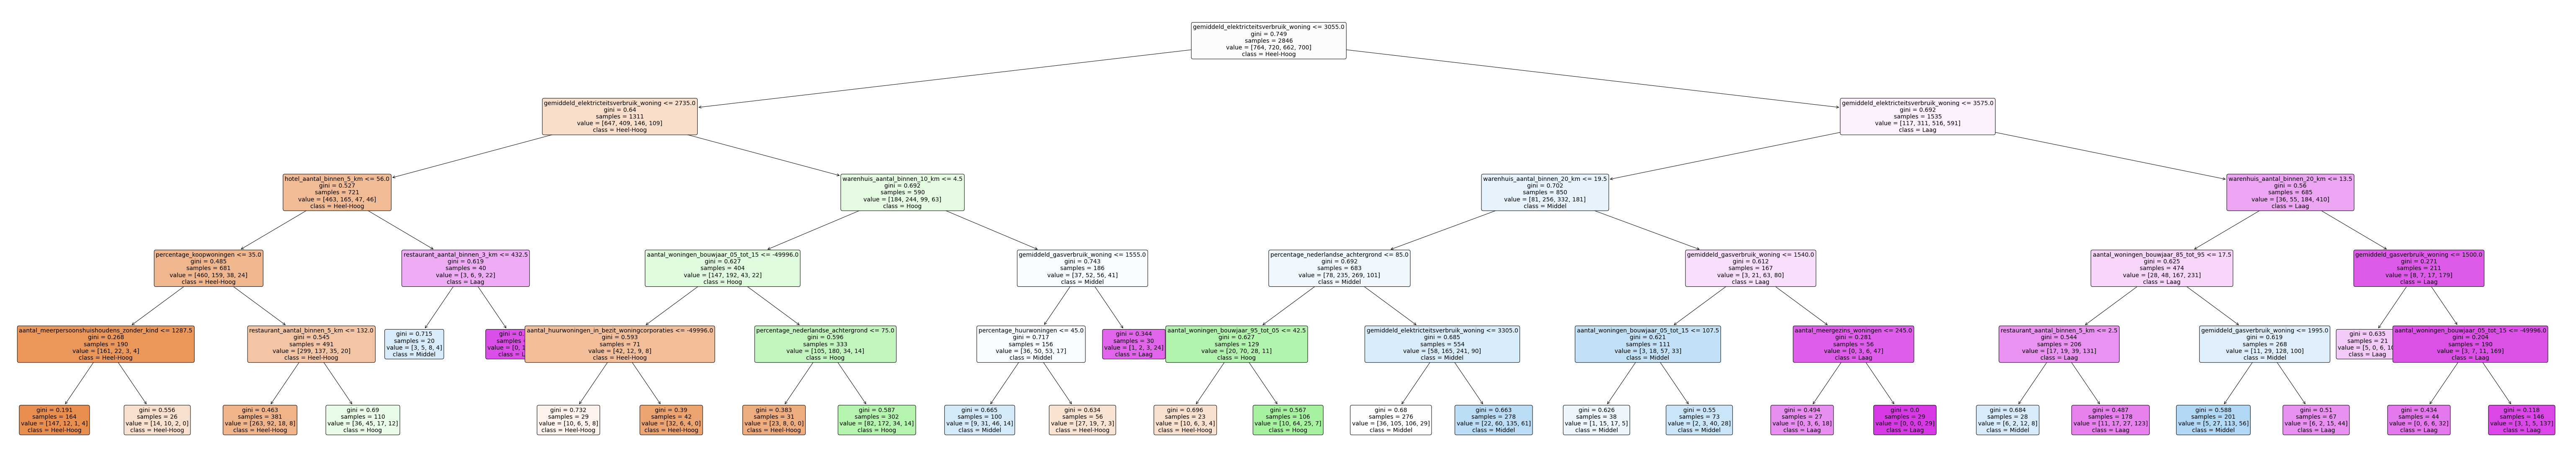

In [40]:
plt.figure(figsize=(110,20))
a = plot_tree(clf, 
              feature_names=feature_cols, 
              class_names=['Heel-Hoog','Hoog','Middel','Laag'], 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('woztree.png')

<h1>conclusie</h1>

> Conclusie de belangrijkste factor in deze dataset bij het voorspellen van een wozwaarde is het gemideld gebruik van electriciteit
daarna
het aantal waren huizen binnen 10 en 20 km en het aantal hotels binnen 5 km 

>dit is logisch want in steden heb je meer warenhuizen en hotels  en daar zijn de woz waarden ook hoger

>dit model heeft een Accuracy van 0.5540983606557377 
dat is te laag om mee te voorspellen  en daarom raadt ik op het moment dit model nog niet aan het kan zo zijn dat als er meer data op variabelen bijkomen dat de accuracy omhoog gaat en het model dan wel bruikbaar wordt

>Advies: ga opzoek naar meer datapunten of maak een specifiekere dataset om de dataset te vergroten
    want op dit moment kan het model op zn best 65 procent van de tijd een goede klasse voorspellen